In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

Define our parameters

In [13]:
# biological parameters 
k_on = 5 # rate of monomer addition, per min
k_off = 6 # rate of monomer subtraction, per min

# simulation parameters
dt = 0.01 # min
n_steps = 1000

# number of trajectories to do
n_trajs = 1000

# new 2D array for saving lengths
L = np.zeros([n_trajs, n_steps])
L[:,0] = 1

Allowed transitions:

L $\rightarrow$ L + 1, with probability $k_{on} \times dt$

L $\rightarrow$ L - 1, with probability $k_{off} \times dt$

L $\rightarrow$ L, with probability $1 - k_{on} \times dt - k_{off} \times dt$

Scale up to do for multiple trajectories

In [15]:
# first loop through trajectories
for n in range(n_trajs):

    # then loop through time
    for t in range(1, n_steps):
        rand = np.random.uniform()

        # check for production
        if rand < k_on*dt:
            L[n,t] = L[n,t-1] + 1

        # check for degradation
        elif rand > 1 - k_off*dt:
            # make sure there are at least two monomers
            # for degradation to occur
            if L[n,t-1] > 1:
                L[n,t] = L[n,t-1] - 1 
            else: 
                L[n,t] = 1

        # otherwise length stays the same
        else:
            L[n,t] = L[n,t-1]

Text(0,0.5,'MT length (monomers)')

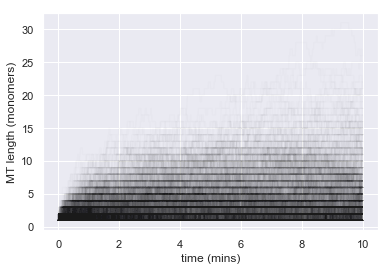

In [17]:
for n in range(n_trajs):
    plt.plot(np.arange(n_steps)*dt, L[n,:], "k", alpha = 0.01)
plt.xlabel("time (mins)")
plt.ylabel("MT length (monomers)")

Plot final distribution

Text(0,0.5,'counts')

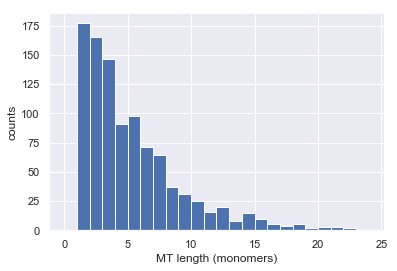

In [18]:
plt.hist(L[:,-1], bins=np.arange(25));
plt.xlabel("MT length (monomers)")
plt.ylabel("counts")

In [20]:
# rate of Kip3 binding
k_bind = 0.05

# new 2D array for saving lengths
L = np.zeros([n_trajs, n_steps])
L[:,0] = 1

# first loop through trajectories
for n in range(n_trajs):

    # then loop through time
    for t in range(1, n_steps):
        rand = np.random.uniform()
        
        # calculate k_off
        k_off = k_bind * L[n,t-1]

        # check for production
        if rand < k_on*dt:
            L[n,t] = L[n,t-1] + 1

        # check for degradation
        elif rand > 1 - k_off*dt:
            # make sure there are at least two monomers
            # for degradation to occur
            if L[n,t-1] > 1:
                L[n,t] = L[n,t-1] - 1 
            else: 
                L[n,t] = 1

        # otherwise length stays the same
        else:
            L[n,t] = L[n,t-1]

Text(0,0.5,'MT length (monomers)')

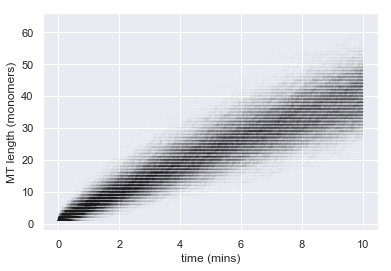

In [21]:
for n in range(n_trajs):
    plt.plot(np.arange(n_steps)*dt, L[n,:], "k", alpha = 0.01)
plt.xlabel("time (mins)")
plt.ylabel("MT length (monomers)")

Text(0,0.5,'counts')

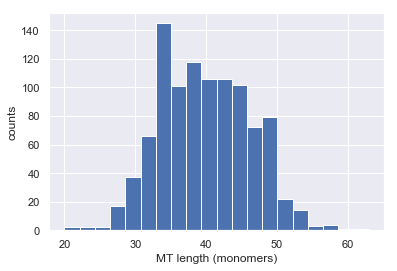

In [24]:
plt.hist(L[:,-1], bins=20);
plt.xlabel("MT length (monomers)")
plt.ylabel("counts")

In [25]:
# limit the monomer pool
n_monomers = 100 

# new 2D array for saving lengths
L = np.zeros([n_trajs, n_steps])
L[:,0] = 1

# first loop through trajectories
for n in range(n_trajs):

    # then loop through time
    for t in range(1, n_steps):
        rand = np.random.uniform()
        
        # calculate k_off
        k_off = k_bind * L[n,t-1]
            
        # calculate k_on
        limited_k_on = k_on * (n_monomers - L[n,t-1]) / n_monomers
        
        # calculate

        # check for production
        if rand < limited_k_on*dt:
            L[n,t] = L[n,t-1] + 1

        # check for degradation
        elif rand > 1 - k_off*dt:
            # make sure there are at least two monomers
            # for degradation to occur
            if L[n,t-1] > 1:
                L[n,t] = L[n,t-1] - 1 
            else: 
                L[n,t] = 1

        # otherwise length stays the same
        else:
            L[n,t] = L[n,t-1]

Text(0,0.5,'MT length (monomers)')

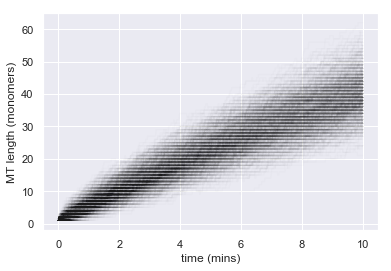

In [26]:
for n in range(n_trajs):
    plt.plot(np.arange(n_steps)*dt, L[n,:], "k", alpha = 0.01)
plt.xlabel("time (mins)")
plt.ylabel("MT length (monomers)")

Text(0,0.5,'counts')

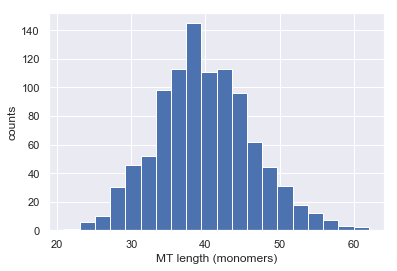

In [27]:
plt.hist(L[:,-1], bins=20);
plt.xlabel("MT length (monomers)")
plt.ylabel("counts")